In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


C:\Users\hp\AppData\Local\Temp\ipykernel_7112\4056416768.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


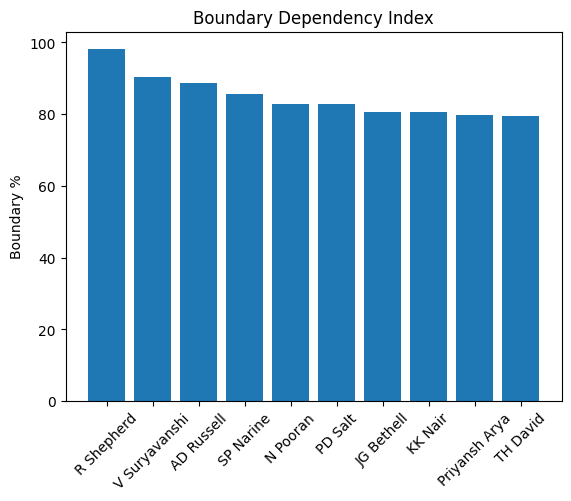

In [2]:
query = """
SELECT
    p.player_name,
    SUM(bd.runs_batter) AS total_runs,
    SUM(CASE WHEN bd.is_four = 1 THEN 4 ELSE 0 END +
        CASE WHEN bd.is_six = 1 THEN 6 ELSE 0 END) AS boundary_runs
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING total_runs >= 50
"""
df = pd.read_sql(query, conn)

df["boundary_pct"] = (df["boundary_runs"] / df["total_runs"]) * 100

df = df.sort_values("boundary_pct", ascending=False).head(10)

plt.figure()
plt.bar(df["player_name"], df["boundary_pct"])
plt.xticks(rotation=45)
plt.ylabel("Boundary %")
plt.title("Boundary Dependency Index")
plt.show()


In [3]:
query = """
SELECT
    p.player_name AS batter,
    COUNT(DISTINCT bd.match_id) AS matches_played,
    COUNT(*) AS balls_faced,
    SUM(CASE WHEN bd.is_six = 1 THEN 1 ELSE 0 END) AS sixes
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING sixes > 0
ORDER BY sixes DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)

df["balls_per_six"] = df["balls_faced"] / df["sixes"]
df


C:\Users\hp\AppData\Local\Temp\ipykernel_7112\2414851816.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,matches_played,balls_faced,sixes,balls_per_six
0,N Pooran,11,217,34.0,6.382353
1,Priyansh Arya,13,228,28.0,8.142857
2,R Parag,13,242,27.0,8.962963
3,SS Iyer,12,261,27.0,9.666667
4,SA Yadav,12,308,26.0,11.846154
5,YBK Jaiswal,13,340,26.0,13.076923
6,P Simran Singh,13,301,25.0,12.040000
7,JC Buttler,11,312,22.0,14.181818
8,AM Rahane,11,267,20.0,13.350000
9,MR Marsh,10,255,20.0,12.750000


In [4]:
query = """
SELECT 
    p.player_name AS batter,
    COUNT(*) AS fours
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
WHERE bd.is_four = 1
GROUP BY p.player_name
ORDER BY fours DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_7112\1300005030.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,batter,fours
0,B Sai Sudharsan,56
1,YBK Jaiswal,55
2,P Simran Singh,55
3,Shubman Gill,51
4,SA Yadav,51
5,JC Buttler,49
6,V Kohli,44
7,Priyansh Arya,43
8,RD Rickelton,42
9,TM Head,41
